# Introduction to EHR

In this module, you will learn about basics of EHR data.

An electronic health record (EHR) is a digital version of a patient’s medical information. EHRs are created and maintained by healthcare providers and can be shared among providers at different healthcare setting. EHRs can contain a wide range of data, such as medical history, medication usage, allergies, vaccination history, lab results, radiology images, vital signs, payment information, and personal information such as height, weight, age, and other demographics.

![Sample view of EHR data](https://blueehr.com/blogs/wp-content/uploads/2017/09/mips-reporting_patient-portal-1024x581-1.png)
<center> The image is credit to <a href = "https://blueehr.com/blogs/">blueEHR </a> </center>

**Here are some advantages of EHRs:**

- Up-to-date, accurate information about the patient can lead to more effective diagnoses, reduced errors, and safer care.
- Easier access to patient records.
- Secure sharing of EHR data with patients and medical staff.
- Reduced cost due to less paperwork, fewer duplicate tests, safer care, and better health.

Right now, EHRs are widely applied around health systems. Clinicians and researchers are able to find valuable information about patients and population efficiently.


## 1. EHRs data architecture

EHR data is extracted from various clinical sources, it can be huge and messy.

![EHR data](./Images/EHR.jpg)
<center> The image is credit to <a href = "https://doi.org/10.1016/B978-0-12-817356-5.00016-4">Medical Big Data Mining and Processing in e-Healthcare </a> </center>

To organize the data in an efficient method, health ITs usually do some pre-processing to divide the huge datasets into smaller file blocks. Each block will represent a specific area of the health records. 

And then, by integrating with relational [database](https://en.wikipedia.org/wiki/Database) concepts, we could treat the huge datasets as a single database schema and the smaller blocks can be converted into tables.
For each table, there will be multiple rows to store records corresponding to various patients and encounters. 

With the applications of database management systems, we are able to store, query and analyze the EHR data in a structured and easier way. 

Below is an example : 

| Table Name             | Table Description                                                                                                                  | Table Category        |
| ---------------------- | ---------------------------------------------------------------------------------------------------------------------------------- | --------------------- |
| encounters             | Encounter records for each patient                                                                                                 | Administrative Data   |
| diagnoses              | Diagnoses records for each encounter                                                                                                       | Clinical Data         |
| intake_outtake         | Intake and output measurements related data                                                                                        | Clinical Data         |
| labs                   | Laboratory results with details including lab names, specimen taken date and time, unit, and LOINC codes.                          | Clinical Data         |
| meds                   | Medication data with details including medication name, dose, and date and time stamps.                                            | Clinical Data         |
| procedures             | Patient procedure records: ICD9, ICD10, and CPT including the “procedure_hierarchy”                                                | Clinical Data         |
| vitals                 | Patient vitals records: heart rate, blood pressure and etc                                                                         | Clinical Data         |
| internal_stations      | Information regarding patient's location including enter and exit times to each location                                           | Health System Data    |

Traditionally, people will use [SQL](https://en.wikipedia.org/wiki/SQL) databases to store the big data. Recently, there are more ideas such as [GraphQL](https://en.wikipedia.org/wiki/GraphQL).

## 3. Looking into EHR data

Now, let's look into the `sample EHR data` with `Python` and find out some interesting statistics.


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

# Step 1. Load the sample EHR data

sample_ehr = pd.read_csv('./SampleDatasets/encounters_sample.csv', usecols = ['patient_deiden_id', 'sex', 'race', 'birth_date', 'merged_admit_datetime', 'patient_type'])

print(f'The sample data contains : {sample_ehr.shape[0]} rows. \nHere are the first 10 rows:')
sample_ehr.head(10)

The sample data contains : 497 rows. 
Here are the first 10 rows:


,sex,race,birth_date,patient_deiden_id,merged_admit_datetime,patient_type
0,FEMALE,WHITE,1932-03-21,114927,2017-02-02 15:58:00,OBSERVATION
1,MALE,WHITE,1947-12-04,114920,2017-03-30 09:16:00,AMBULATORY SURGERY
2,MALE,WHITE,1934-05-25,114985,2017-04-05 08:44:00,INPATIENT
3,FEMALE,WHITE,1944-09-01,114930,2016-02-15 09:39:00,AMBULATORY SURGERY
4,MALE,WHITE,1945-09-25,114931,2017-01-20 12:45:00,AMBULATORY SURGERY
5,FEMALE,OTHER,2000-03-20,114917,2019-01-13 04:53:00,INPATIENT
6,FEMALE,WHITE,1978-08-30,114977,2014-11-01 04:44:00,INPATIENT
7,MALE,WHITE,1938-11-20,114918,2016-06-17 12:01:00,INPATIENT
8,MALE,WHITE,1938-11-20,114918,2016-08-12 10:02:00,AMBULATORY SURGERY
9,FEMALE,BLACK,1979-12-23,114978,2016-12-20 12:11:00,AMBULATORY SURGERY


From the sample EHR data, we could fetch sex, race, birth_date and other information for each patient.

* `patient_deiden_id`, it's an de-identified identifier to represent each patient in the EHR data.

In [2]:
# Get the distribution of unique races from sample patients
_unique_races = sample_ehr['race'].value_counts()
_unique_races


WHITE              329
BLACK              129
OTHER               29
ASIAN                5
AMERICAN INDIAN      3
UNKNOWN              1
MULTIRACIAL          1
Name: race, dtype: int64

By checking the distribution, the percentage of last couple of race types is quite low, which we could merge them into 'OTHER'. 

In [3]:
sample_ehr['race'] = sample_ehr['race'].apply(lambda x: x if x in ['WHITE', 'BLACK', 'OTHER'] else 'OTHER')
_unique_races = sample_ehr['race'].value_counts()
_unique_races

WHITE    329
BLACK    129
OTHER     39
Name: race, dtype: int64

In [4]:
# Calculate the ages of each patient when they admited into the hospital

from datetime import date, datetime
### datetime libray is a common Python package used to process with datetime values

def calculateAge(row):
    birth_date = row['birth_date']
    admit_datetime = row['merged_admit_datetime']
    born = datetime.strptime(birth_date, "%Y-%m-%d").date()
    admit = datetime.strptime(admit_datetime, "%Y-%m-%d %H:%M:%S")
    return admit.year - born.year - ((admit.month, 
                                      admit.day) < (born.month, 
                                                    born.day))


sample_ehr['admit_age'] = sample_ehr[['birth_date', 'merged_admit_datetime']].apply(lambda row : calculateAge(row), axis = 1)
print('The update sample data with age column : ')
sample_ehr.head(10)

The update sample data with age column : 


,sex,race,birth_date,patient_deiden_id,merged_admit_datetime,patient_type,admit_age
0,FEMALE,WHITE,1932-03-21,114927,2017-02-02 15:58:00,OBSERVATION,84
1,MALE,WHITE,1947-12-04,114920,2017-03-30 09:16:00,AMBULATORY SURGERY,69
2,MALE,WHITE,1934-05-25,114985,2017-04-05 08:44:00,INPATIENT,82
3,FEMALE,WHITE,1944-09-01,114930,2016-02-15 09:39:00,AMBULATORY SURGERY,71
4,MALE,WHITE,1945-09-25,114931,2017-01-20 12:45:00,AMBULATORY SURGERY,71
5,FEMALE,OTHER,2000-03-20,114917,2019-01-13 04:53:00,INPATIENT,18
6,FEMALE,WHITE,1978-08-30,114977,2014-11-01 04:44:00,INPATIENT,36
7,MALE,WHITE,1938-11-20,114918,2016-06-17 12:01:00,INPATIENT,77
8,MALE,WHITE,1938-11-20,114918,2016-08-12 10:02:00,AMBULATORY SURGERY,77
9,FEMALE,BLACK,1979-12-23,114978,2016-12-20 12:11:00,AMBULATORY SURGERY,36


Now let's group the age by different levels.

In [5]:
def groupAge(age: int):
    if(age < 30):
        return 'Less than 30'
    elif(age < 50):
        return '30 to 50'
    else:
        return 'More than 50'
    
sample_ehr['ageLevel'] = sample_ehr['admit_age'].apply(lambda x : groupAge(x))
_unique_agelevels = sample_ehr['ageLevel'].value_counts()
_unique_agelevels

More than 50    318
30 to 50        136
Less than 30     43
Name: ageLevel, dtype: int64

As you can see, right now we get the distribution of race and age levels. To visualize the distribution well, we could draw some images. 

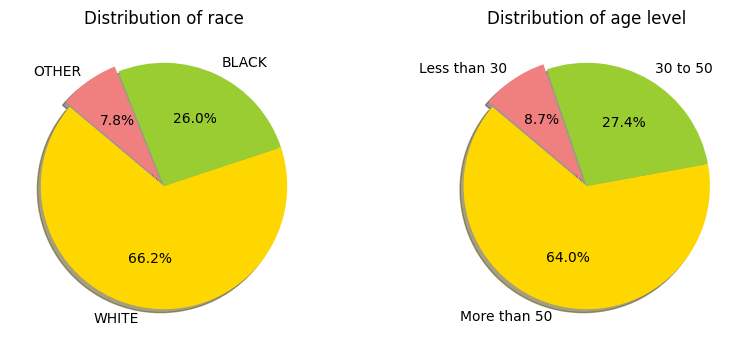

In [6]:
from matplotlib import pyplot as plt
import numpy as np

def createExplode(data:list,):
    explode = (0,)   # explode 1st slice
    for i in range(len(data) - 1):
        explode += (0.05 * i,)
        
    return explode
    
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'limegreen', 'orangered', 'dodgerblue']
resourceData = [_unique_races , _unique_agelevels]
titles = ['Distribution of race', 'Distribution of age level']

fig, axes = plt.subplots(1, len(resourceData), figsize = (10,4))

for i in range(len(resourceData)):
    _temp = dict(resourceData[i])
    data = list(_temp.values())
    labels = list(_temp.keys())
    _= axes[i].pie(data, explode=createExplode(data), labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance=0.6)
    _= axes[i].set_title(titles[i])
    
plt.show()



Now it's your time to try, can you please get the distribution of `sex`and `patient type` for the sample data ? 

In [7]:
# Get the distribution of sex

# Get the distribution of patient type


It's interesting right ?
Besides those statistics, there are more useful and valuable statistics containing in the EHR data. Let's move on to the next course and get more details of EHR data.



> By following the policy of privacy, all data provided with the course is de-identified. 
